# Capstone Project

### This note book will be used for Capstone project

In [147]:
import pandas as pd
import numpy as np

In [148]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


# A description of the problem and a discussion of the background.

The purpose or the goal of this project is to predict the possibility which the car accident can occur during the road trip. 


# A description of the data and how it will be used to solve the problem.

1. Data Collection: Upload CSV
2. Data Understanding: Check data types
3. Data Preparation: Delete irrelevant column & replace missing data & grouping
4. Data Analysis: Find relevancy between each columns and accidents occruances + Show Map of accidents
5. Conclusion: summarize findings

# 1. Upload csv file to Notebook (DATA COLLECTION)

Import items

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [150]:
# Download the Data Collision file from Coursra and put link of the file to file_name
file_name = 
data = pd.read_csv(file_name)


/Users/PJ/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [151]:
data.head()
data = data.set_index("SEVERITYCODE")

# 2. Understand the Data (DATA UNDERSTANDING)

In [152]:
# check types of data
data.dtypes

X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: object

In [153]:
# Statistics of Data
data.describe()

,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [154]:
# Get the dimension of the data frame
data.shape

(194673, 37)

# 3. Organize the data (DATA PREPARATION)

Drop irrelevant section

<b>HITPARKEDCAR</b>: Whether or not the collision invovled hitting a parked a car

<b>OBJECTID</b>: ESRI Unique identifier

<b>SHAPE</b>: ESRI geometry field

<b>INCKEY</b>: A unique key for the incident

<b>SDOTCOLNUM</b>: A number given to the collision by SDOT

<b>ST_COLCODE</b>

<b>X</b>

<b>Y</b>

<b>REPORTNO</b>

<b>INTKEY</b>: Key that corresponds to the intersection associated with a collision

<b>COLDETKEY</b>: Secondary key for the incident

<b>PERSONCOUNT</b>: The total number of people invovled in the collison

<b>PEDCOUNT</b>: The number of pedestrains invovled in the collison

<b>PEDCYLCOUNT</b>: The number of bicycles invovled in the collision.

<b>SEVERITYCODE.1</b>: 

<b>SDOT_COLCODE</b>: A code given to the collision by SDOT

<b>INATTENTIONIND</b>: Whether or not collision was due to inattention

<b>SDOTCOLNUM</b>: A number given to the collision by SDOT

<b>SEGLANEKEY</b>: A key for the lane segment in which the colllision occurred

<b>CROSSWALKKEY</b>: A key for the crosswalk at which the collision occurred

In [155]:
# Erase irrelevant data
Erase_column = ["HITPARKEDCAR", "OBJECTID", "SHAPE", "INCKEY", "SPOTCOLNUM", "ST_COLCODE", "X", "Y", 
                "REPORTNO", "INTKEY", "COLDETKEY", "PERSONCOUNT", "PEDCOUNT", "PEDCYLCOUNT", 
                "SEVERITYCODE.1", "SDOT_COLCODE", "INATTENTIONIND", "SDOTCOLNUM", "SEGLANEKEY", 
                "CROSSWALKKEY"]

for column in Erase_column: 
    if column in data.keys():
        data.drop(column, axis = 1, inplace = True)

In [156]:
# Check modified data set
data.head()

,STATUS,ADDRTYPE,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYDESC,COLLISIONTYPE,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLDESC
SEVERITYCODE,,,,,,,,,,,,,,,,,,,
1,Matched,Intersection,10TH AVE AND E JEFFERSON ST,NaN,NaN,Property Damage Only Collision,Rear Ended,2,2007/12/03 00:00:00+00,0:00:00,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,Raining,Wet,Dark - Street Lights On,NaN,Y,From same direction - both going straight - on...
1,Matched,Intersection,10TH AVE AND E JEFFERSON ST,,NaN,Property Damage Only Collision,Angles,2,2017/06/01 00:00:00+00,7:29:00,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Raining,Wet,Daylight,NaN,NaN,Entering at angle
1,Matched,Intersection,10TH AVE AND E JEFFERSON ST,,NaN,Property Damage Only Collision,Angles,2,2017/06/08 00:00:00+00,8:22:00,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Raining,Wet,Daylight,NaN,NaN,Entering at angle
2,Matched,Intersection,10TH AVE AND E JEFFERSON ST,,NaN,Injury Collision,Cycles,1,2019/04/19 00:00:00+00,15:52:00,At Intersection (intersection related),"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",N,Raining,Wet,Daylight,NaN,NaN,Vehicle Strikes Pedalcyclist
1,Matched,Intersection,10TH AVE AND E JEFFERSON ST,,NaN,Property Damage Only Collision,Other,2,2019/10/22 00:00:00+00,17:00:00,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Overcast,Wet,Daylight,NaN,NaN,From same direction - all others


In [157]:
# See overall data types in each column
for column in data.keys():
    print("Data in", column, "are\n",
          data[column].value_counts(),"\n")
    

Data in STATUS are
 Matched      189786
Unmatched      4887
Name: STATUS, dtype: int64 

Data in ADDRTYPE are
 Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64 

Data in LOCATION are
 BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N    276
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB    271
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N          265
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST                    254
6TH AVE AND JAMES ST                                              252
                                                                 ... 
28TH AVE NW BETWEEN NW 74TH ST AND NW 75TH ST                       1
17TH AVE NE AND NE 94TH ST                                          1
24TH AVE NW BETWEEN NW 85TH ST AND NW 87TH ST                       1
55TH AVE NE BETWEEN NE 70TH ST AND NE 73RD ST                       1
LYNN ST BETWEEN 1ST AVE N AND WARREN AVE N                         

In [158]:
data.columns

Index(['STATUS', 'ADDRTYPE', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYDESC', 'COLLISIONTYPE', 'VEHCOUNT', 'INCDATE', 'INCDTTM',
       'JUNCTIONTYPE', 'SDOT_COLDESC', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING', 'ST_COLDESC'],
      dtype='object')

In [159]:
# Method of selecting specific column to check
column_name = input("Type the Column to search: ")
    
while column_name.upper() not in data.columns:
    print("column not in columns, type again")
    column_name = input("Type the Column to search: ")
print("Data in", column_name.upper(), "are\n", data[column_name.upper()].value_counts(),"\n")


Type the Column to search: status
Data in STATUS are
 Matched      189786
Unmatched      4887
Name: STATUS, dtype: int64 



https://www.w3resource.com/pandas/dataframe/dataframe-dropna.php#:~:text=The%20dropna()%20function%20is%20used%20to%20remove%20missing%20values.&text=Determine%20if%20rows%20or%20columns,rows%20which%20contain%20missing%20values.

### a. Need to erase "Unmatched" in STATUS [COMPLETED] 

In [160]:
# Drop Column
data["STATUS"].values
data["STATUS"].value_counts()

Matched      189786
Unmatched      4887
Name: STATUS, dtype: int64

In [161]:
# Select only Matched data
data = data[data.STATUS != "Unmatched"]

In [162]:
data.drop("STATUS", axis = 1, inplace = True)
data

,ADDRTYPE,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYDESC,COLLISIONTYPE,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLDESC
SEVERITYCODE,,,,,,,,,,,,,,,,,,
1,Intersection,10TH AVE AND E JEFFERSON ST,NaN,NaN,Property Damage Only Collision,Rear Ended,2,2007/12/03 00:00:00+00,0:00:00,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,Raining,Wet,Dark - Street Lights On,NaN,Y,From same direction - both going straight - on...
1,Intersection,10TH AVE AND E JEFFERSON ST,,NaN,Property Damage Only Collision,Angles,2,2017/06/01 00:00:00+00,7:29:00,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Raining,Wet,Daylight,NaN,NaN,Entering at angle
1,Intersection,10TH AVE AND E JEFFERSON ST,,NaN,Property Damage Only Collision,Angles,2,2017/06/08 00:00:00+00,8:22:00,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Raining,Wet,Daylight,NaN,NaN,Entering at angle
2,Intersection,10TH AVE AND E JEFFERSON ST,,NaN,Injury Collision,Cycles,1,2019/04/19 00:00:00+00,15:52:00,At Intersection (intersection related),"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",N,Raining,Wet,Daylight,NaN,NaN,Vehicle Strikes Pedalcyclist
1,Intersection,10TH AVE AND E JEFFERSON ST,,NaN,Property Damage Only Collision,Other,2,2019/10/22 00:00:00+00,17:00:00,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Overcast,Wet,Daylight,NaN,NaN,From same direction - all others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,Alley,NaN,,NaN,Property Damage Only Collision,Head On,2,2015/07/03 00:00:00+00,17:00:00,NaN,NOT ENOUGH INFORMATION / NOT APPLICABLE,N,Unknown,NaN,Unknown,NaN,NaN,From opposite direction - all others
1,Alley,NaN,,NaN,Property Damage Only Collision,Other,1,2015/06/11 00:00:00+00,2:30:00,NaN,NOT ENOUGH INFORMATION / NOT APPLICABLE,N,NaN,NaN,NaN,NaN,NaN,Fixed object
2,Alley,NaN,,NaN,Injury Collision,Other,1,2015/12/08 00:00:00+00,8:00:00,NaN,NOT ENOUGH INFORMATION / NOT APPLICABLE,N,NaN,NaN,NaN,NaN,NaN,Fixed object


### b.  Erase row with Unusable data in EXCEPTRSNCODE & EXCEPTRSNDESC [COMPLETE]

In [163]:
#EXCEPTRSNCODE value check
data["EXCEPTRSNCODE"].value_counts()


       75058
NEI     4866
Name: EXCEPTRSNCODE, dtype: int64

In [164]:
# Drop data with "NEI"
data = data[data.EXCEPTRSNCODE != "NEI"]
data["EXCEPTRSNCODE"].value_counts()

     75058
Name: EXCEPTRSNCODE, dtype: int64

In [165]:
# Drop ESCEPTRSNCODE & EXCEPTRSNDESC column
data.drop("EXCEPTRSNCODE", axis = 1, inplace = True)
data.drop("EXCEPTRSNDESC", axis = 1, inplace = True)


/Users/PJ/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [166]:
data

,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLDESC
SEVERITYCODE,,,,,,,,,,,,,,,,
1,Intersection,10TH AVE AND E JEFFERSON ST,Property Damage Only Collision,Rear Ended,2,2007/12/03 00:00:00+00,0:00:00,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,Raining,Wet,Dark - Street Lights On,NaN,Y,From same direction - both going straight - on...
1,Intersection,10TH AVE AND E JEFFERSON ST,Property Damage Only Collision,Angles,2,2017/06/01 00:00:00+00,7:29:00,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Raining,Wet,Daylight,NaN,NaN,Entering at angle
1,Intersection,10TH AVE AND E JEFFERSON ST,Property Damage Only Collision,Angles,2,2017/06/08 00:00:00+00,8:22:00,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Raining,Wet,Daylight,NaN,NaN,Entering at angle
2,Intersection,10TH AVE AND E JEFFERSON ST,Injury Collision,Cycles,1,2019/04/19 00:00:00+00,15:52:00,At Intersection (intersection related),"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",N,Raining,Wet,Daylight,NaN,NaN,Vehicle Strikes Pedalcyclist
1,Intersection,10TH AVE AND E JEFFERSON ST,Property Damage Only Collision,Other,2,2019/10/22 00:00:00+00,17:00:00,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Overcast,Wet,Daylight,NaN,NaN,From same direction - all others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,Block,WESTLAKE AVE N BETWEEN HARRISON ST AND REPUBLI...,Property Damage Only Collision,Parked Car,2,2019/11/12 00:00:00+00,15:45:00,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Overcast,NaN,Dusk,NaN,NaN,One parked--one moving
2,Block,YESLER WAY BETWEEN 6TH AVE AND 8TH AVE,Injury Collision,Parked Car,4,2008/12/18 00:00:00+00,8:30:00,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,NaN,NaN,NaN,NaN,NaN,One parked--one moving
1,Alley,NaN,Property Damage Only Collision,Head On,2,2015/07/03 00:00:00+00,17:00:00,NaN,NOT ENOUGH INFORMATION / NOT APPLICABLE,N,Unknown,NaN,Unknown,NaN,NaN,From opposite direction - all others


### c. Erase UNKNOWN in JUNCTIONTYPE [COMPLETE]

In [167]:
data["JUNCTIONTYPE"].value_counts()
data = data[data.JUNCTIONTYPE != "Unknown"]

In [168]:
data["JUNCTIONTYPE"].value_counts()

Mid-Block (not related to intersection)              85537
At Intersection (intersection related)               60871
Mid-Block (but intersection related)                 22354
Driveway Junction                                    10527
At Intersection (but not related to intersection)     2027
Ramp Junction                                          159
Name: JUNCTIONTYPE, dtype: int64

### d. Erase Other or Unknown in Weather

In [169]:
data["WEATHER"].value_counts()
data = data[data.WEATHER != "Unknown"]
data = data[data.WEATHER != "Other"]

In [170]:
data["WEATHER"].value_counts()

Clear                       109737
Raining                      32811
Overcast                     27423
Snowing                        886
Fog/Smog/Smoke                 557
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               49
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

### e. Erase 0:00:00 in INCDTTM because it means NAN

In [171]:
data["INCDTTM"].value_counts()
data = data[data.INCDTTM != "0:00:00"]

In [172]:
data["INCDTTM"].value_counts()

13:00:00    812
17:00:00    769
12:00:00    726
15:00:00    722
14:00:00    696
           ... 
3:46:00       9
4:22:00       8
4:41:00       8
5:01:00       6
4:33:00       3
Name: INCDTTM, Length: 1439, dtype: int64

### f. Check missing data and delete missing data for seleted column

In [173]:
# Check Missing data
data.isnull().sum()

ADDRTYPE              2
LOCATION            534
SEVERITYDESC          0
COLLISIONTYPE        18
VEHCOUNT              0
INCDATE               0
INCDTTM               0
JUNCTIONTYPE       1540
SDOT_COLDESC          0
UNDERINFL             0
WEATHER             180
ROADCOND            100
LIGHTCOND           222
PEDROWNOTGRNT    144693
SPEEDING         140921
ST_COLDESC           18
dtype: int64

In [174]:
data.dropna(subset=['LOCATION', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 
                    'LIGHTCOND', 'ST_COLDESC'])

,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLDESC
SEVERITYCODE,,,,,,,,,,,,,,,,
1,Intersection,10TH AVE AND E JEFFERSON ST,Property Damage Only Collision,Angles,2,2017/06/01 00:00:00+00,7:29:00,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Raining,Wet,Daylight,NaN,NaN,Entering at angle
1,Intersection,10TH AVE AND E JEFFERSON ST,Property Damage Only Collision,Angles,2,2017/06/08 00:00:00+00,8:22:00,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Raining,Wet,Daylight,NaN,NaN,Entering at angle
2,Intersection,10TH AVE AND E JEFFERSON ST,Injury Collision,Cycles,1,2019/04/19 00:00:00+00,15:52:00,At Intersection (intersection related),"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",N,Raining,Wet,Daylight,NaN,NaN,Vehicle Strikes Pedalcyclist
1,Intersection,10TH AVE AND E JEFFERSON ST,Property Damage Only Collision,Other,2,2019/10/22 00:00:00+00,17:00:00,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Overcast,Wet,Daylight,NaN,NaN,From same direction - all others
1,Intersection,10TH AVE AND E MADISON ST,Property Damage Only Collision,Angles,2,2005/10/31 00:00:00+00,17:24:00,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Raining,Wet,Dark - Street Lights On,NaN,NaN,Entering at angle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,Block,YORK RD S BETWEEN 36TH AVE S AND 37TH AVE S,Property Damage Only Collision,Other,1,2005/02/21 00:00:00+00,2:33:00,Mid-Block (but intersection related),MOTOR VEHICLE STRUCK OBJECT IN ROAD,0,Clear,Dry,Dark - Street Lights On,NaN,NaN,Fixed object
1,Block,YORK RD S BETWEEN 36TH AVE S AND 37TH AVE S,Property Damage Only Collision,Parked Car,2,2011/12/04 00:00:00+00,9:45:00,Mid-Block (but intersection related),MOTOR VEHICLE STRUCK OBJECT IN ROAD,N,Clear,Dry,Daylight,NaN,Y,One parked--one moving
2,Intersection,YUKON AVE S AND S HENDERSON ST,Injury Collision,Left Turn,2,2005/06/23 00:00:00+00,17:23:00,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Clear,Dry,Daylight,NaN,NaN,From opposite direction - one left turn - one ...


### g. Grouping 

In [175]:
data.dtypes

ADDRTYPE         object
LOCATION         object
SEVERITYDESC     object
COLLISIONTYPE    object
VEHCOUNT          int64
INCDATE          object
INCDTTM          object
JUNCTIONTYPE     object
SDOT_COLDESC     object
UNDERINFL        object
WEATHER          object
ROADCOND         object
LIGHTCOND        object
PEDROWNOTGRNT    object
SPEEDING         object
ST_COLDESC       object
dtype: object

# 4. Find relevancy between each columns and data [DATA ANALYSIS]

### a. Summarize top factors for each columns

In [176]:


Columns = list(data.columns)
Columns.remove("VEHCOUNT")
data_new = data.copy()

for col in Columns: 
    data_new.set_index(col, inplace=True)
    data_group = data_new.groupby(col)
    data_group_sum = data_group.sum()
    data_group_sum.sort_values(['VEHCOUNT'], ascending=False, axis=0, inplace=True)
    print(data_group_sum.head(30), 
          "\n")


              VEHCOUNT
ADDRTYPE              
Block           189177
Intersection    102424
Alley              884 

                                                    VEHCOUNT
LOCATION                                                    
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORL...       453
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST           432
6TH AVE AND JAMES ST                                     416
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST           398
RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLEL...       388
WEST SEATTLE BR EB BETWEEN ALASKAN WY VI NB ON ...       353
ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY O...       351
AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N               318
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND A...       315
BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB A...       294
ALASKAN WY VI NB BETWEEN SENECA ST OFF RP AND W...       292
ALASKAN WY VI SB BETWEEN COLUMBIA ST ON RP AND ...       290
5TH AVE AND SPRING ST        

### b. Use Visualizaiton to find patterns or relevancies

In [177]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.3


In [178]:
# DATA columns
data.columns

Index(['ADDRTYPE', 'LOCATION', 'SEVERITYDESC', 'COLLISIONTYPE', 'VEHCOUNT',
       'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLDESC', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING',
       'ST_COLDESC'],
      dtype='object')

Enter the name of value: weather
                          VEHCOUNT
WEATHER                           
Clear                       187799
Raining                      55281
Overcast                     46307
Snowing                       1504
Fog/Smog/Smoke                 964
Sleet/Hail/Freezing Rain       176
Blowing Sand/Dirt               89
Severe Crosswind                41
Partly Cloudy                   10


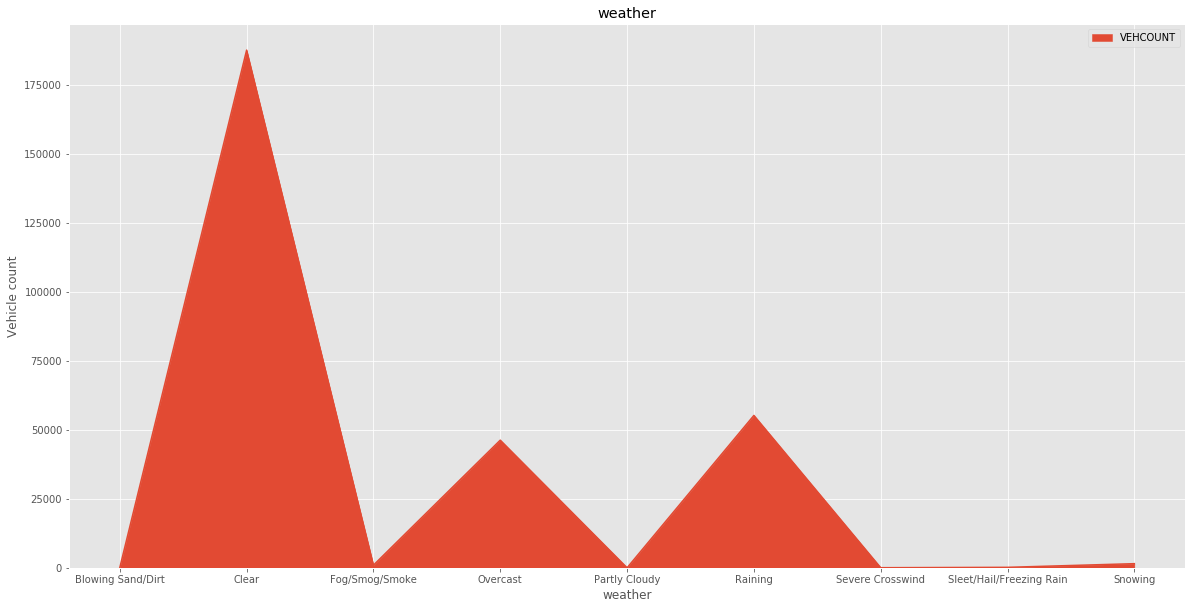

In [179]:
# Area chart
selected_value = input("Enter the name of value: ")
data_copy = data.copy()

while selected_value.upper() not in Columns:
    print("selected value is not in columns")
    selected_value = input("Enter the name of value: ")

data_copy.set_index(selected_value.upper(), inplace=True)
data_group = data_copy.groupby(selected_value.upper())
data_group_sum = data_group.sum()
data_group_sum2 = data_group_sum.copy()
data_group_sum.sort_values(['VEHCOUNT'], ascending=False, axis=0, inplace=True)
print(data_group_sum.head(30))

data_group_sum2.plot(kind='area', 
             stacked=True,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title(selected_value)
plt.ylabel('Vehicle count')
plt.xlabel(selected_value)

plt.show()

### c. Create Map Showing the accident occurred area


In [180]:
data2 = pd.read_csv(file_name)
data2 = data2.set_index("X")
data2 = data2[["Y", "SEVERITYDESC"]]
data2= data2.dropna()
data2.drop_duplicates(['Y'], keep='last')

/Users/PJ/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Y,SEVERITYDESC
X,,
-122.319591,47.645051,Property Damage Only Collision
-122.369063,47.719686,Injury Collision
-122.320220,47.530256,Property Damage Only Collision
-122.320193,47.563493,Property Damage Only Collision
-122.319366,47.600878,Property Damage Only Collision
...,...,...
-122.330420,47.620243,Property Damage Only Collision
-122.330415,47.619197,Property Damage Only Collision
-122.331126,47.601718,Property Damage Only Collision


In [181]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: done

# All requested packages already installed.

Folium installed and imported!


In [182]:
# define the seattle map
world_map = folium.Map()
map_seattle = folium.Map(location=[47.606209, -122.319416], zoom_start=12)

In [183]:


limit = int(input("Insert the number of locations to show in map, less than 23839: "))
data2_new = data2.copy()
data2_new = data2.iloc[0:limit, :]

# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(data2_new.Y, data2_new.index):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='black',
            fill_opacity=0.6
        )
    )

# add incidents to map
map_seattle.add_child(incidents)

Insert the number of locations to show in map, less than 23839: 100


In [185]:
from folium import plugins

# Show by severity description
limit = int(input("Insert the number of locations to show in map, less than 23839: "))
data2_new = data2.copy()
data2_new = data2.iloc[0:limit, :]

incidents = plugins.MarkerCluster().add_to(map_seattle)

for lat, lng, label, in zip(data2_new.Y, data2_new.index, data2_new.SEVERITYDESC):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

map_seattle

Insert the number of locations to show in map, less than 23839: 100


# 5. Major Findings [CONCLUSION] 


## a. Most Accidents happen during afternoon [13:00 ~ 18:00]
## b. Accident happend for Speeding
## c. Major accidents happened when road is Dry and weather is Clear
## d. Accidents mostly happen at Block(especially at Mid-Block] or Intersection
## e. Season seems irrelevant with accident occurance
## f. Most accident occurs as Motor vehicles hit Motor vehicles
## g. More accident happened during daylight

# Exhibit

In [ ]:
SC_Code = {'0': 'Vehicle Going Straight Hits Pedestrian',
           '1': 'Vehicle Turning Right Hits Pedestrian',
           '2': 'Vehicle Turning Left Hits Pedestrian',
           '3': 'Vehicle Backing Hits Pedestrian',
           '4': 'Vehicle Hits Pedestrian - All Other Actions',
           '5': 'Vehicle Hits Pedestrian - Actions Not Stated',
           '10': 'Entering At Angle',
           '11': 'From Same Direction -Both Going Straight-Both Moving- Sideswipe',
           '12': 'From Same Direction -Both Going Straight-One Stopped- Sideswipe',
           '13': 'From Same Direction -Both Going Straing-Both Moving- Rear End',
           '14': 'From Same Direction - Both Going Straight - One Stopped - Rear End',
           '15': 'From Same Direction - One Left Turn - One Straight',
           '16': 'From Same Direction - One Right Turn - One Straight',
           '19': 'One Car Entering Parked Position',
           '20': 'One Car Leaving Parked Position',
           '21': 'One Car Entering Driveway Access',
           '22': 'One Car Leaving Driveway Access',
           '23': 'From Same Direction - All Others',
           '24': 'From Opposite Direction - Both Moving - Head On',
           '25': 'From Opposite Direction - One Stopped - Head On',
           '26': 'From Opposite Direction - Both Going Straight - sideswipe',
           '27': 'From Opposite Direction - Both Going Straight - One Stopped - sideswipe',
           '28': 'From Opposite Direction - One Left Turn - One Straight',
           '29': 'From Opposite Direction - One Left Turn - One Right Turn',
           '30': 'From Opposite Direction - All Others',
           '31': 'Not Stated',
           '32': 'One Parked - One Moving',
           '40': 'Train Struck Moving Vehicle',
           '41': 'Train Struck Stopped or Stalled Vehicle',
           '42': 'Vehicle Struck Moving Train',
           '43': 'Vehicle Struck Stopped Train',
           '44': 'Unicycle',
           '45': 'Bicycle',
           '46': 'Tricycle',
           '47': 'Domestic Animal (horse, cow, sheep, etc)',
           '48': 'Domestic Animal Other (Cat, Dog etc)',
           '49': 'Non Domestic Animal (deer, bear, elk, etc)',
           '50': 'Struck Fixed Object',
           '51': 'Struck Other Object',
           '52': 'Vehicle Overturned',
           '53': 'Person Fell, Jumped, or was Pushed From Vehicle',
           '54': 'Fire Started In Vehicle',
           '55': 'Accidently Overcame By Carbon Monoxide Poison',
           '56': 'Breakage Of Any Part Of the Vehicle Resulting In Injury or in Further Property Damage',
           '57': 'All Other Non-Collisions',
           '60': 'Vehicle Hits State Road or Construction Machinery',
           '61': 'Vehicle Struck By State Road or Construction Machinery',
           '62': 'Vehicle Hits County Road or Construction, Machinery',
           '63': 'Vehicle Struck By County Road or Construction Machinery',
           '64': 'Vehicle Hits City Road or Construction Machinery',
           '65': 'Vehicle Struck By City Road or Construction Machinery',
           '66': 'Vehicle Hits Other Road or Construction Machinery',
           '67': 'Vehicle Struck by Other Road or Construction Machinery',
           '71': 'Same Direction - Both Turning Right - Both Moving - Sideswipe',
           '72': 'Same Direction - Both Turning Right - One Stopped - Sideswipe',
           '73': 'Same Direction - Both Turning Right - Both Moving - Rear End',
           '74': 'Same Direction - Both Turning Right - One Stopped - Rear End',
           '81': 'Same Direction - Both Turning Left - Both Moving - Sideswipe',
           '82': 'Same Direction - Both Turning Left - One Stopped - Sideswipe',
           '83': 'Same Direction - Both Turning Left - Both Moving - Rear End',
           '84': 'Same Direction - Both Turning Left - One Stopped - Rear End'}